In [2]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [69]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

In [4]:
def initialize_clusters(points, k):
    """Initializes clusters as k randomly selected points from points."""
    return points[np.random.randint(points.shape[0], size=k)]

In [5]:
# Function for calculating the distance between centroids
def get_distances(centroid, points):
    """Returns the distance the centroid is from each data point in points."""
    return np.linalg.norm(points - centroid, axis=1)

In [64]:
# Generate dataset
X, y = make_blobs(centers=3, n_samples=500, random_state=1)

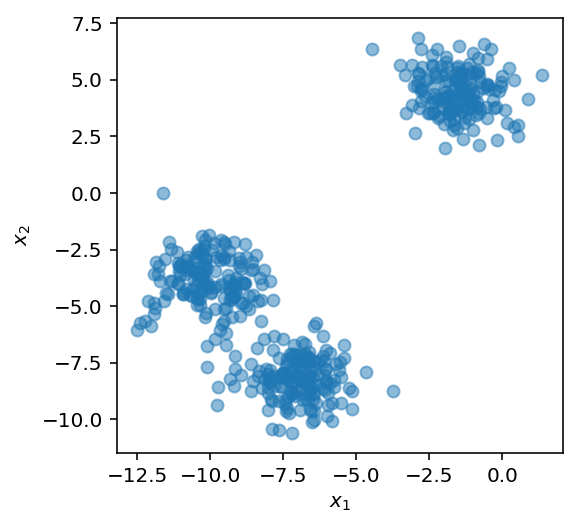

In [65]:
# Visualize
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[:,0], X[:,1], alpha=0.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');


k = 3
maxiter = 50

# Initialize our centroids by picking random data points
centroids = initialize_clusters(X, k)

In [66]:
# Initialize the vectors in which we will store the
# assigned classes of each data point and the
# calculated distances from each centroid
classes = np.zeros(X.shape[0], dtype=np.float64)
distances = np.zeros([X.shape[0], k], dtype=np.float64)

In [67]:
# Loop for the maximum number of iterations
for i in range(maxiter):
    
    # Assign all points to the nearest centroid
    for i, c in enumerate(centroids):
        distances[:, i] = get_distances(c, X)
        
    # Determine class membership of each point
    # by picking the closest centroid
    classes = np.argmin(distances, axis=1)
    
    # Update centroid location using the newly
    # assigned data point classes
    for c in range(k):
        centroids[c] = np.mean(X[classes == c], 0)

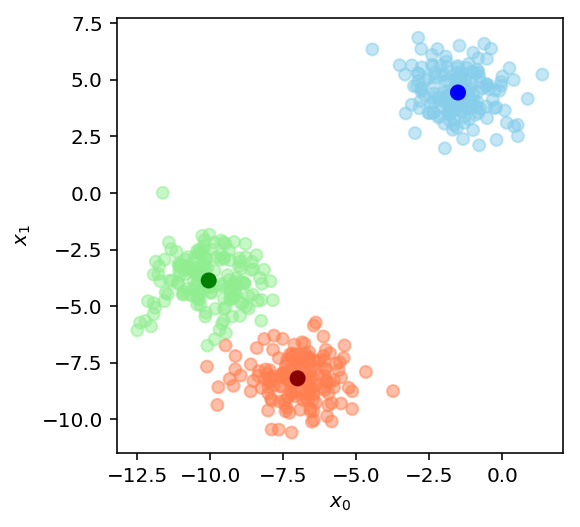

In [68]:
group_colors = ['skyblue', 'coral', 'lightgreen']
colors = [group_colors[j] for j in classes]

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[:,0], X[:,1], color=colors, alpha=0.5)
ax.scatter(centroids[:,0], centroids[:,1], color=['blue', 'darkred', 'green'], marker='o', lw=2)
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$');

In [70]:
del X1,y1

In [71]:
X1,y1 = make_moons(200,noise=0.1)

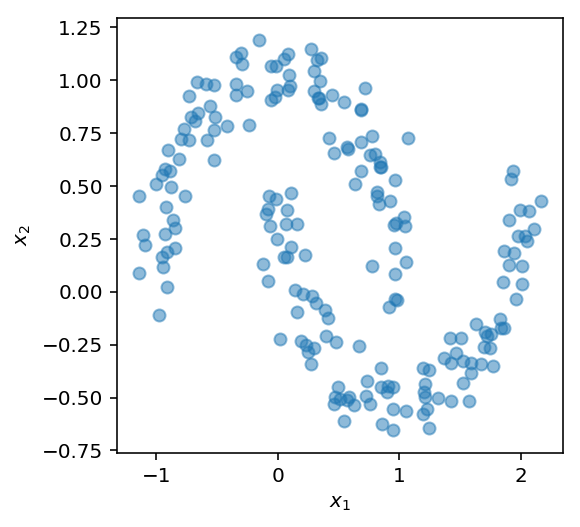

In [72]:
# Visualize
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(X1[:,0], X1[:,1], alpha=0.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

In [73]:
# Initialize the vectors in which we will store the
# assigned classes of each data point and the
# calculated distances from each centroid
classes = np.zeros(X1.shape[0], dtype=np.float64)
distances = np.zeros([X1.shape[0], k], dtype=np.float64)

In [74]:
# Initialize our centroids by picking random data points
centroids = initialize_clusters(X1, k)

In [75]:
# Loop for the maximum number of iterations
for i in range(maxiter):
    
    # Assign all points to the nearest centroid
    for i, c in enumerate(centroids):
        distances[:, i] = get_distances(c, X1)
        
    # Determine class membership of each point
    # by picking the closest centroid
    classes = np.argmin(distances, axis=1)
    
    # Update centroid location using the newly
    # assigned data point classes
    for c in range(k):
        centroids[c] = np.mean(X1[classes == c], 0)

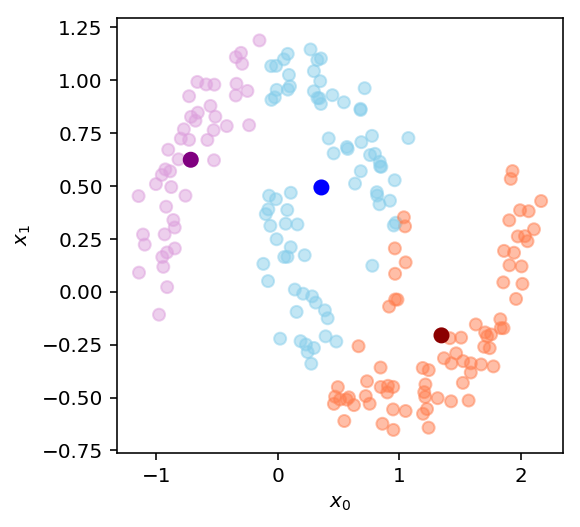

In [79]:
group_colors = ['skyblue', 'coral', 'plum']
colors = [group_colors[j] for j in classes]

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(X1[:,0], X1[:,1], color=colors, alpha=0.5)
ax.scatter(centroids[:,0], centroids[:,1], color=['blue', 'darkred', 'purple'], marker='o', lw=2)
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$');

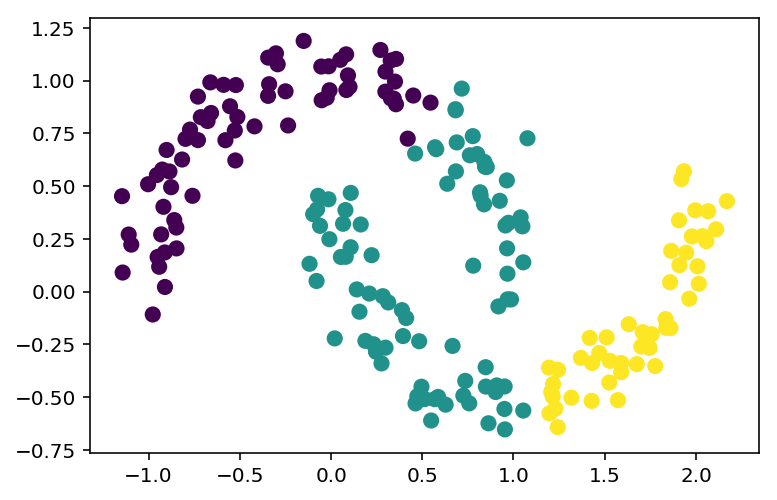

In [81]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=labels,
            s=50, cmap='viridis');

In [103]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.35, min_samples=15).fit(X1)

In [104]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

C:\Users\cduk7o28\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 500 but corresponding boolean dimension is 200
  if sys.path[0] == '':
C:\Users\cduk7o28\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 500 but corresponding boolean dimension is 200
  app.launch_new_instance()


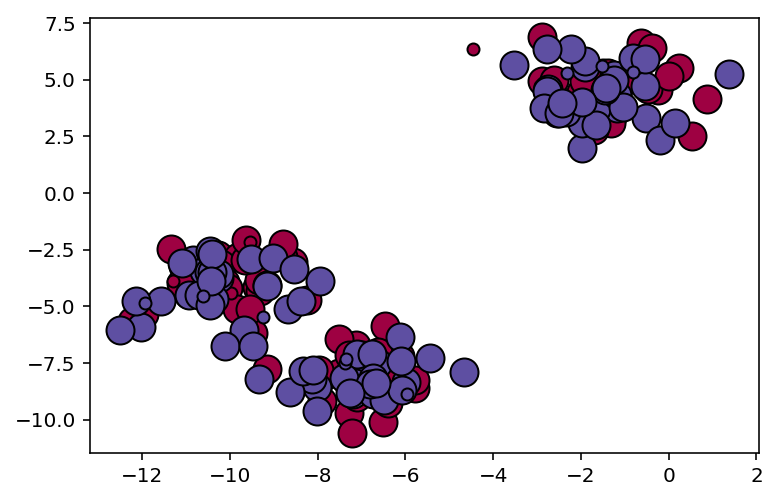

In [105]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

C:\Users\cduk7o28\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\cduk7o28\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\cduk7o28\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\cduk7o28\A

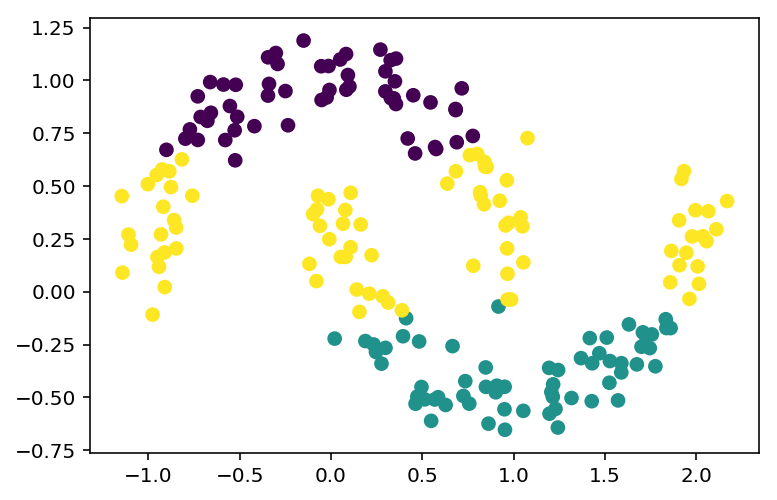

In [107]:
from sklearn.mixture import GMM
gmm = GMM(n_components=3).fit(X1)
labels = gmm.predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=labels, s=40, cmap='viridis');

In [108]:
probs = gmm.predict_proba(X1)
print(probs[:5].round(3))

[[ 0.     0.87   0.13 ]
 [ 0.056  0.     0.944]
 [ 0.     0.998  0.002]
 [ 0.     0.317  0.683]
 [ 0.031  0.     0.969]]


C:\Users\cduk7o28\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


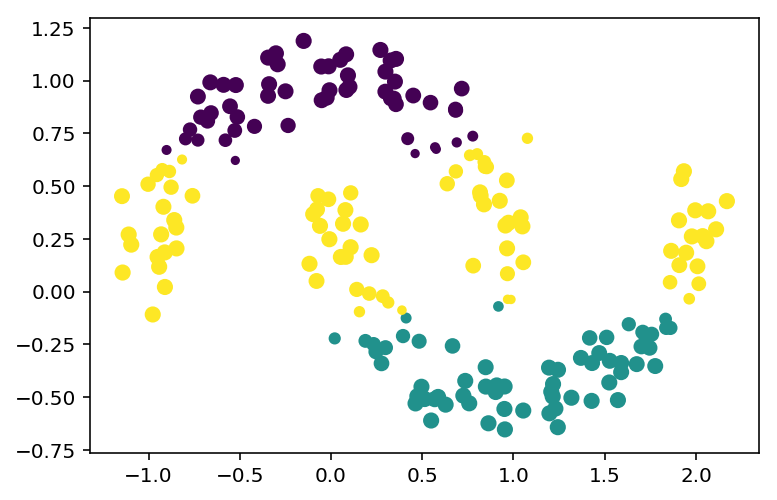

In [109]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X1[:, 0], X1[:, 1], c=labels, cmap='viridis', s=size);